In [18]:
import vanna
from vanna.remote import VannaDefault

In [26]:
api_key = vanna.get_api_key('my_mail')

vanna_model_name = "adventure_works_poc"
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

# Training
You only need to train once. Do not train again unless you want to add more training data.

In [27]:
vn.connect_to_postgres("localhost","Adventureworks","postgres","postgres",5432)

In [28]:
# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
vn.train(plan=plan)

# Ask questions

SELECT SUM(salestotal)
FROM sales.vsalespersonsalesbyfiscalyearsdata


,sum
0,78490296.6918


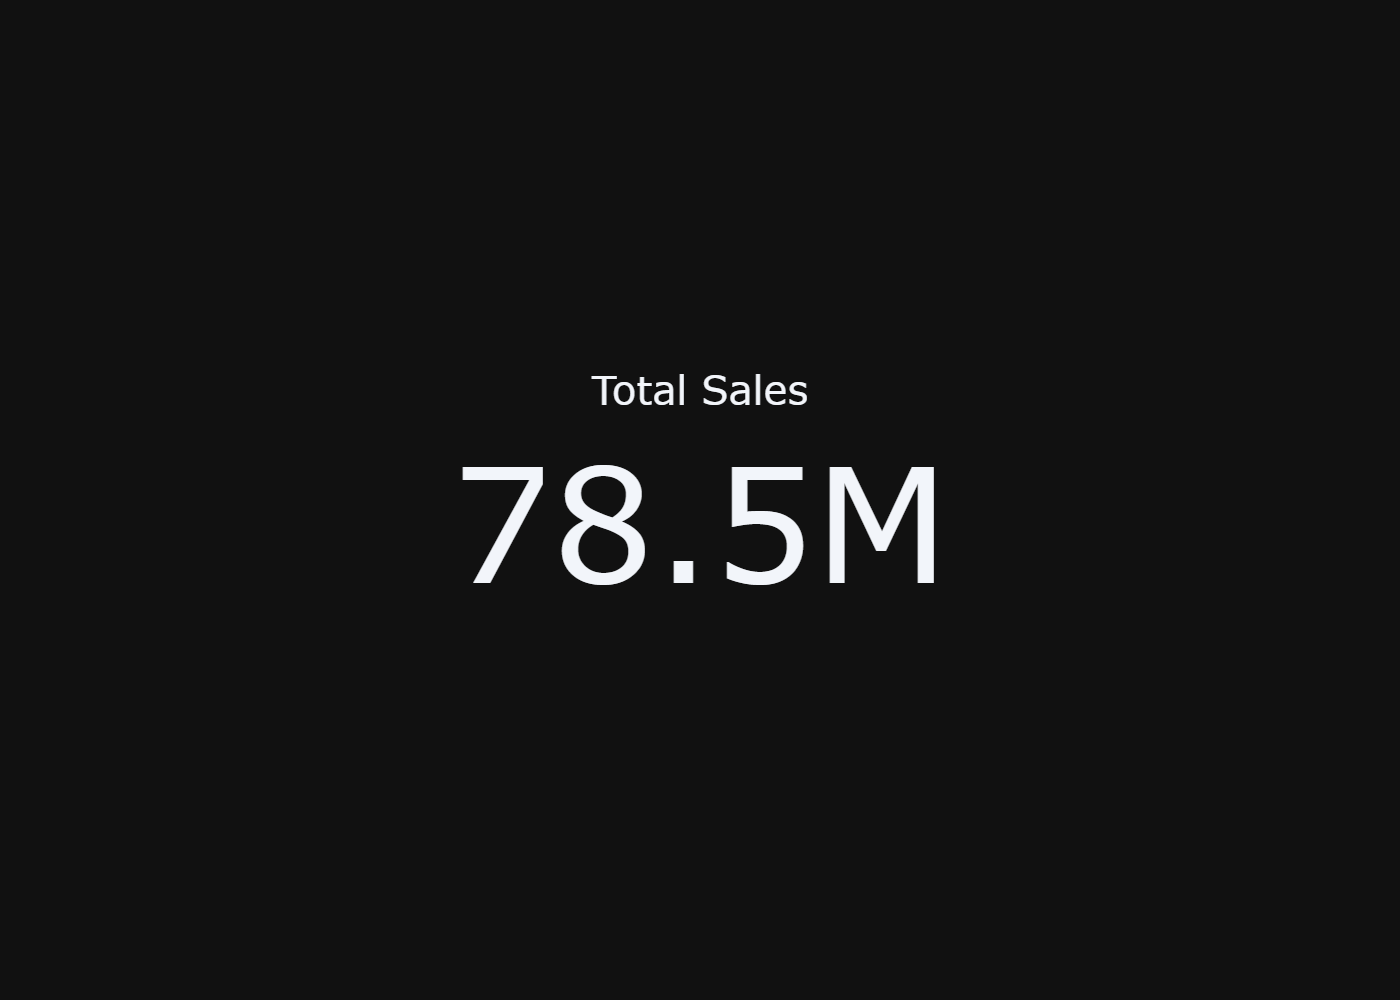

In [36]:
# vn.ask("What it is the middlename of Terri Duffy?")
# vn.ask("What job has Terri Duffy?")
vn.ask("What is the total sales?")


In [37]:
vn.ask("What is the total profit")


SELECT SUM(salesytd - totalcost) AS total_profit
FROM sales.salesperson


ValidationError: column "totalcost" does not exist
LINE 1: SELECT SUM(salesytd - totalcost) AS total_profit
                              ^


SELECT SUM(standardcost)
FROM production.productcosthistory


,sum
0,171535.0024


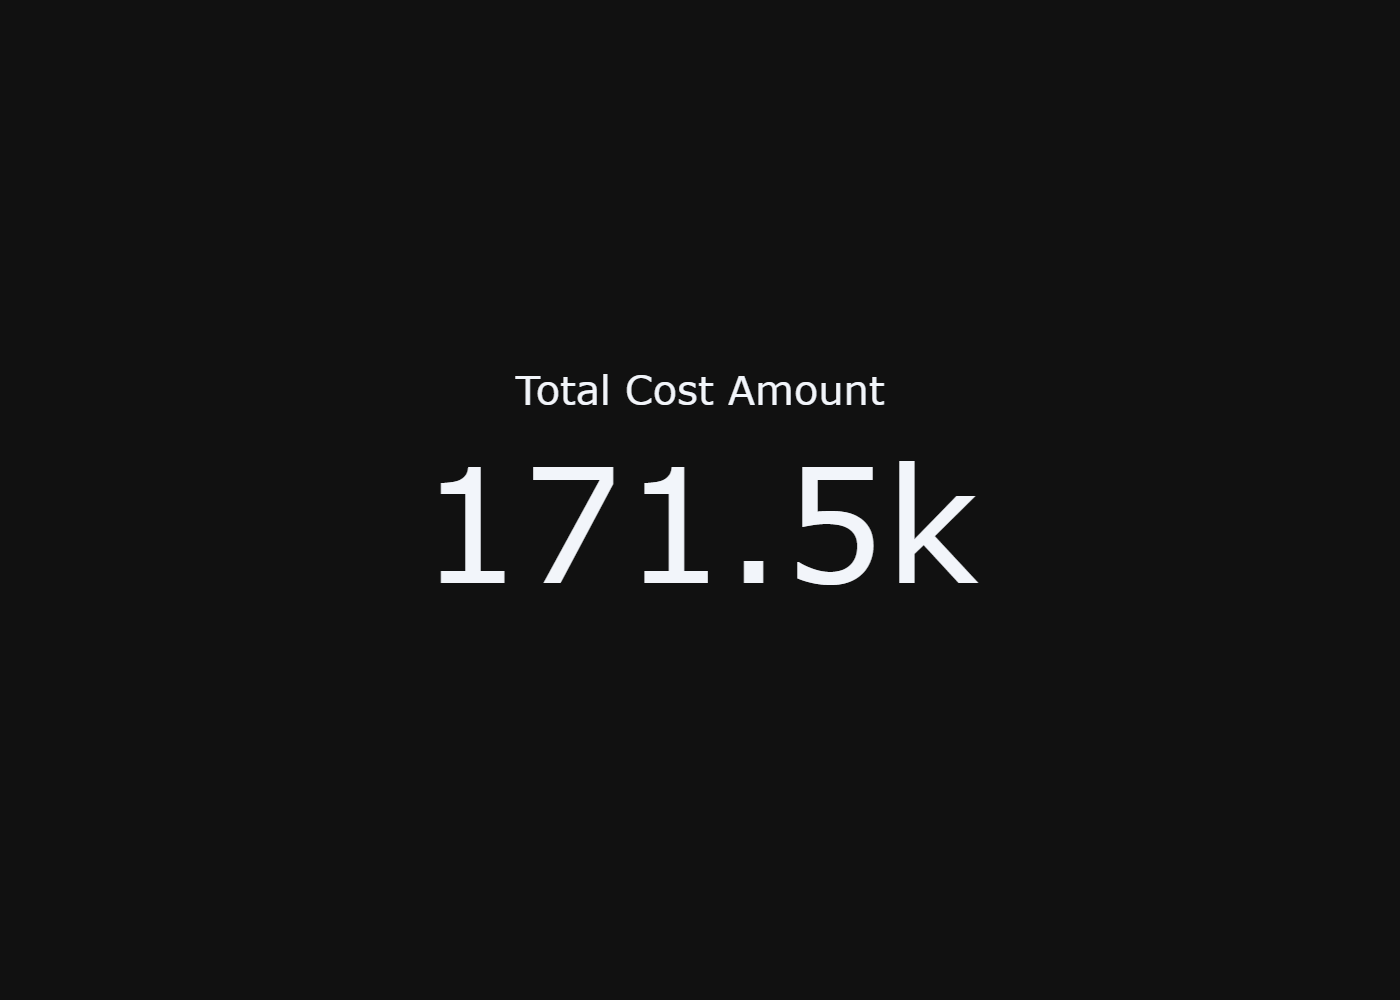

In [38]:
vn.ask("What is the total cost amount")


SELECT SUM(standardcost)
FROM production.productcosthistory


,sum
0,171535.0024


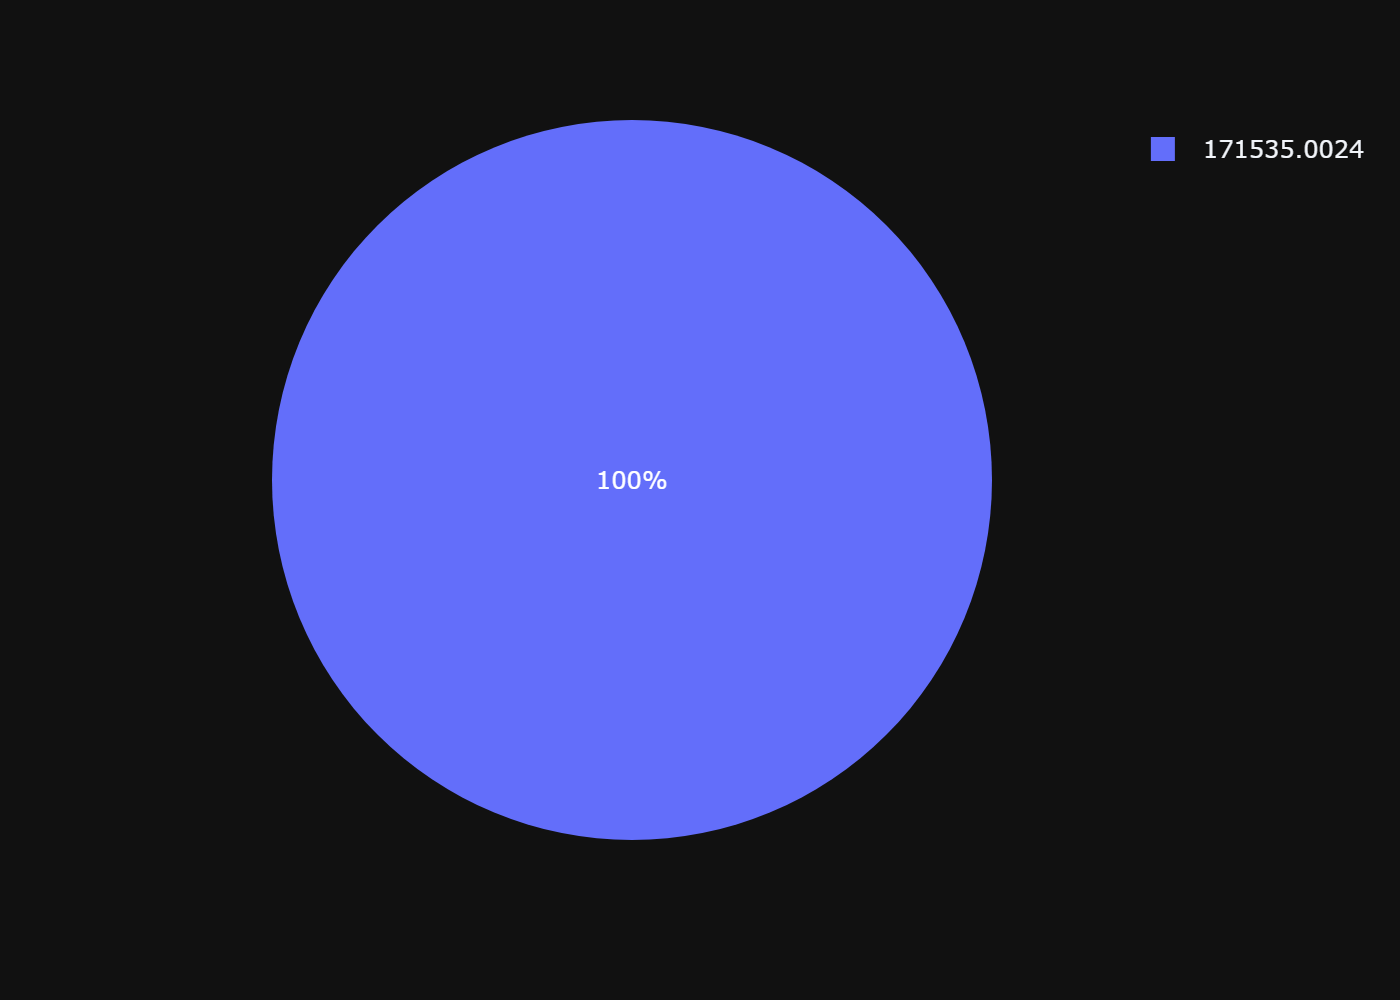

In [39]:
vn.ask("What is the total cost amount")


SELECT SUM(standardcost)
FROM production.productcosthistory


,sum
0,171535.0024


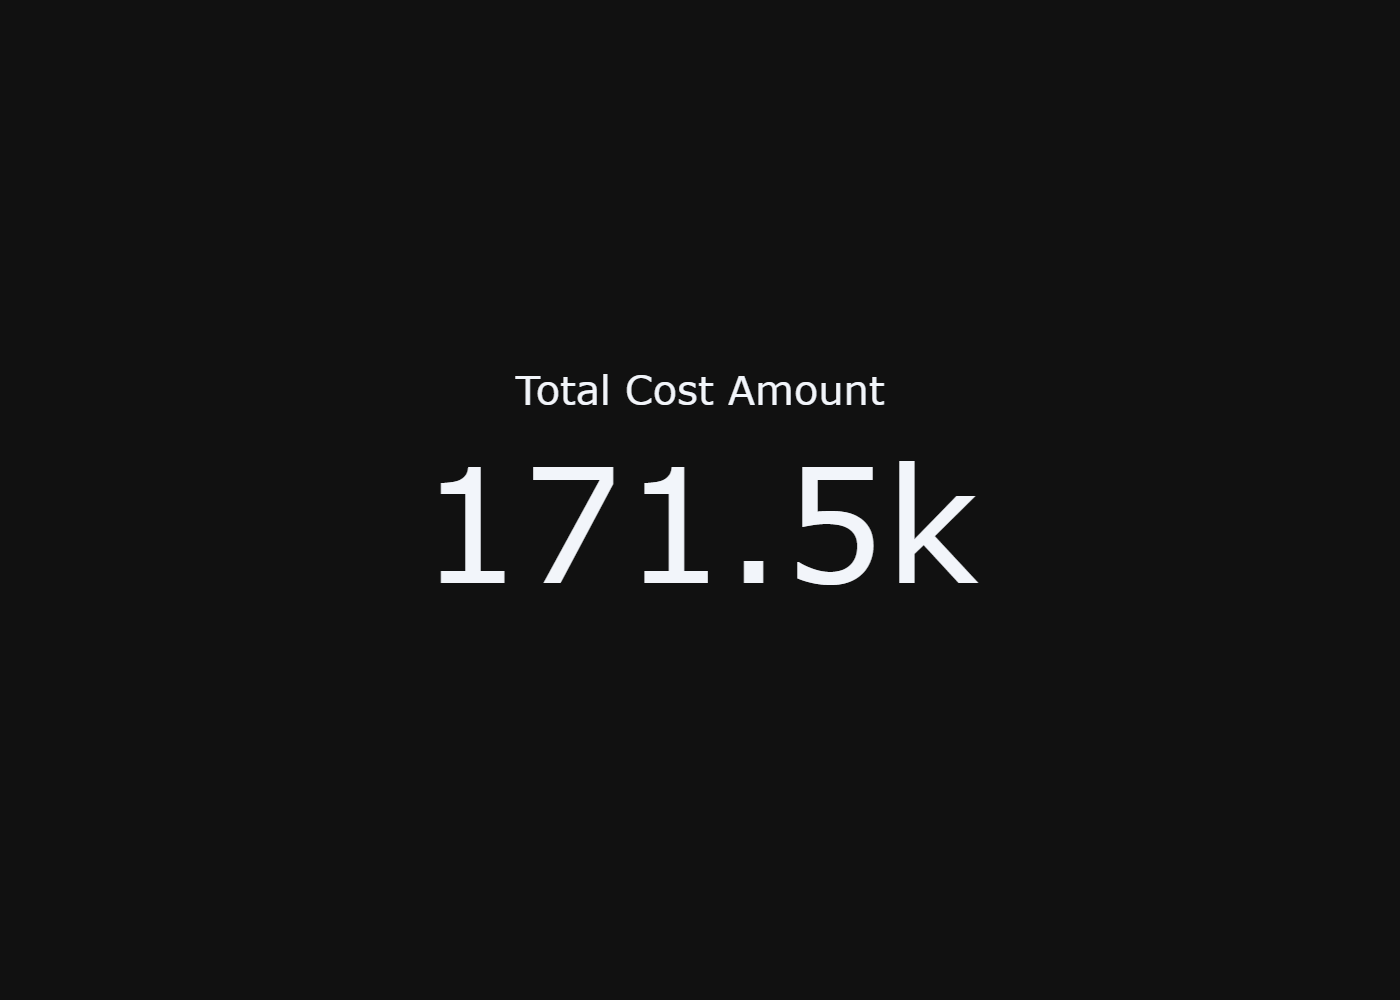

In [40]:
vn.ask("What is the total cost amount")


SELECT AVG(salestotal)
FROM sales.vsalespersonsalesbyfiscalyearsdata


,avg
0,1635214.514412500000


<string>:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



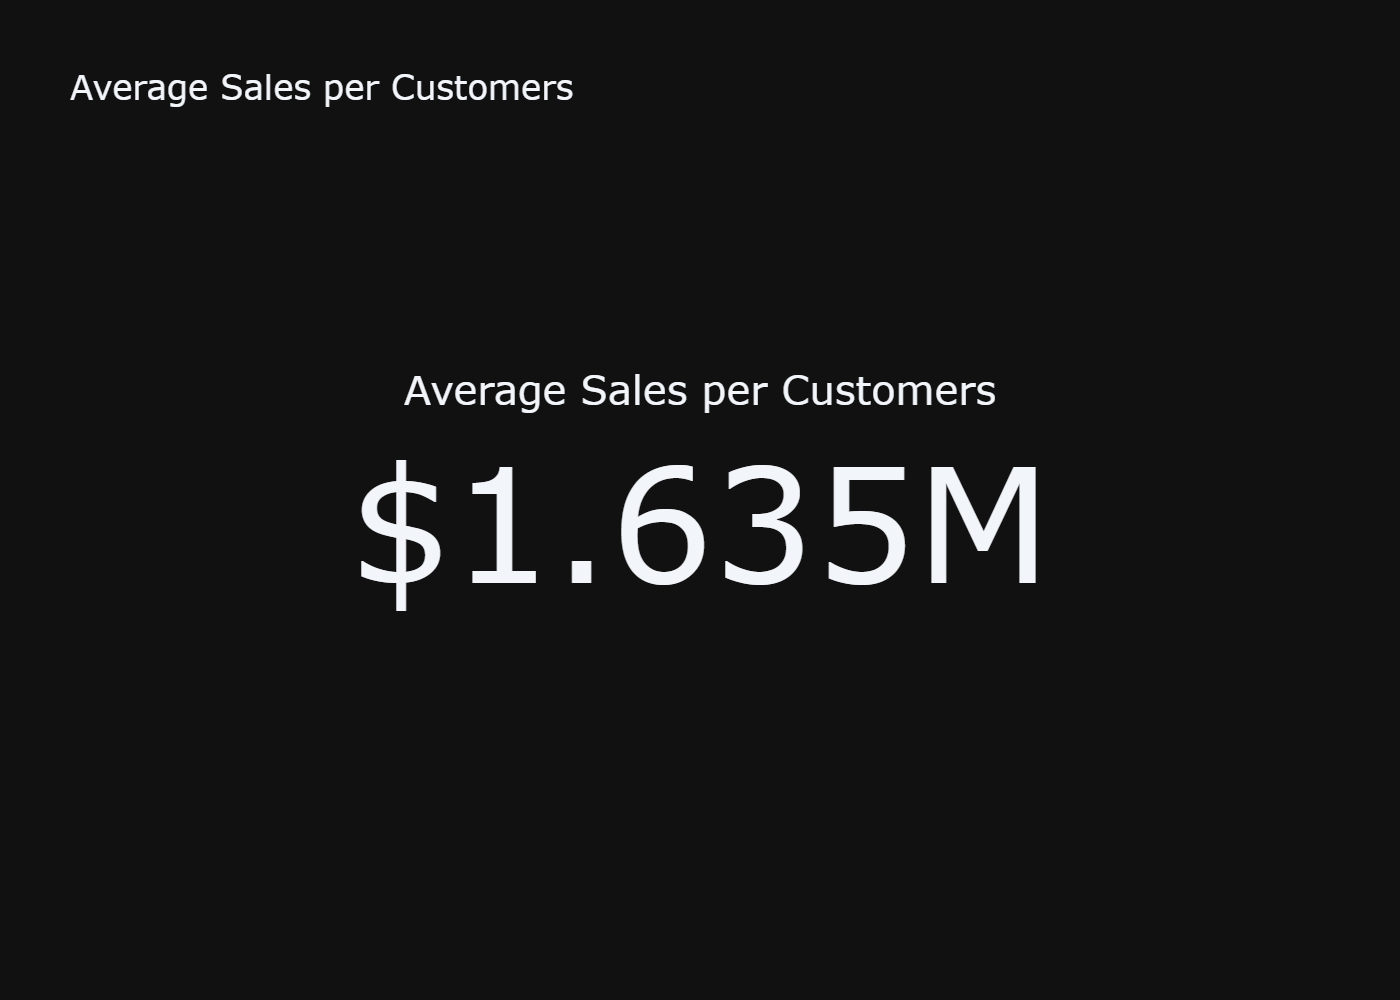

In [41]:
vn.ask("What is the average sales per customers")


SELECT pc.name AS category_name, COUNT(p.productid) AS product_count
FROM production.product p
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
GROUP BY pc.name


,category_name,product_count
0,Bikes,97
1,Accessories,29
2,Clothing,35
3,Components,134


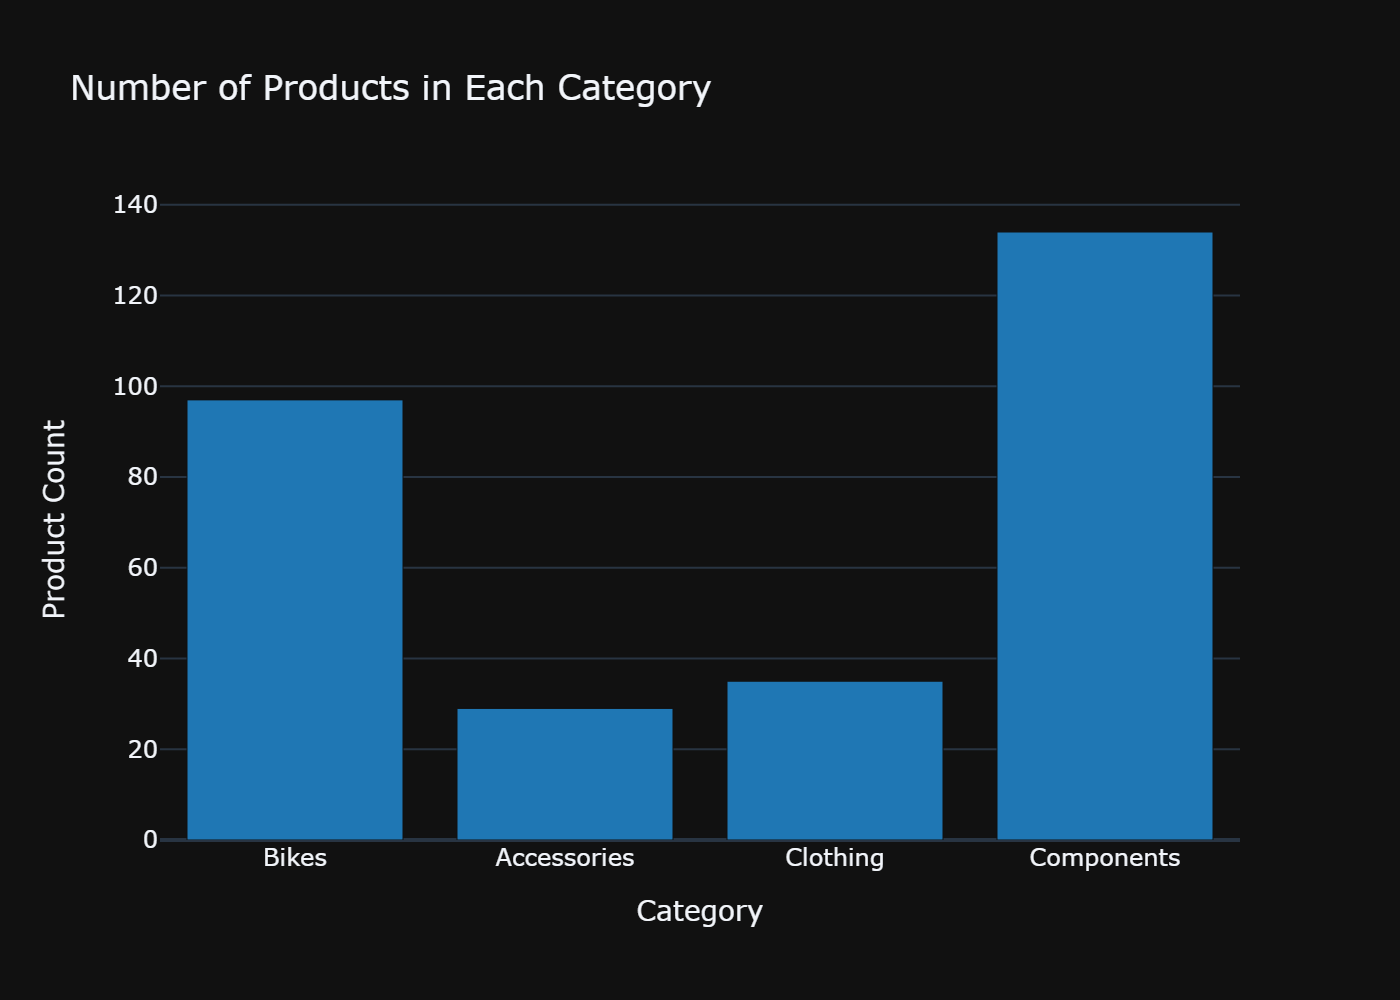

In [43]:
vn.ask("What is the number of products in each category")


SELECT pc.name AS category_name, COUNT(p.productid) AS product_count
FROM production.product p
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
GROUP BY pc.name


,category_name,product_count
0,Bikes,97
1,Accessories,29
2,Clothing,35
3,Components,134


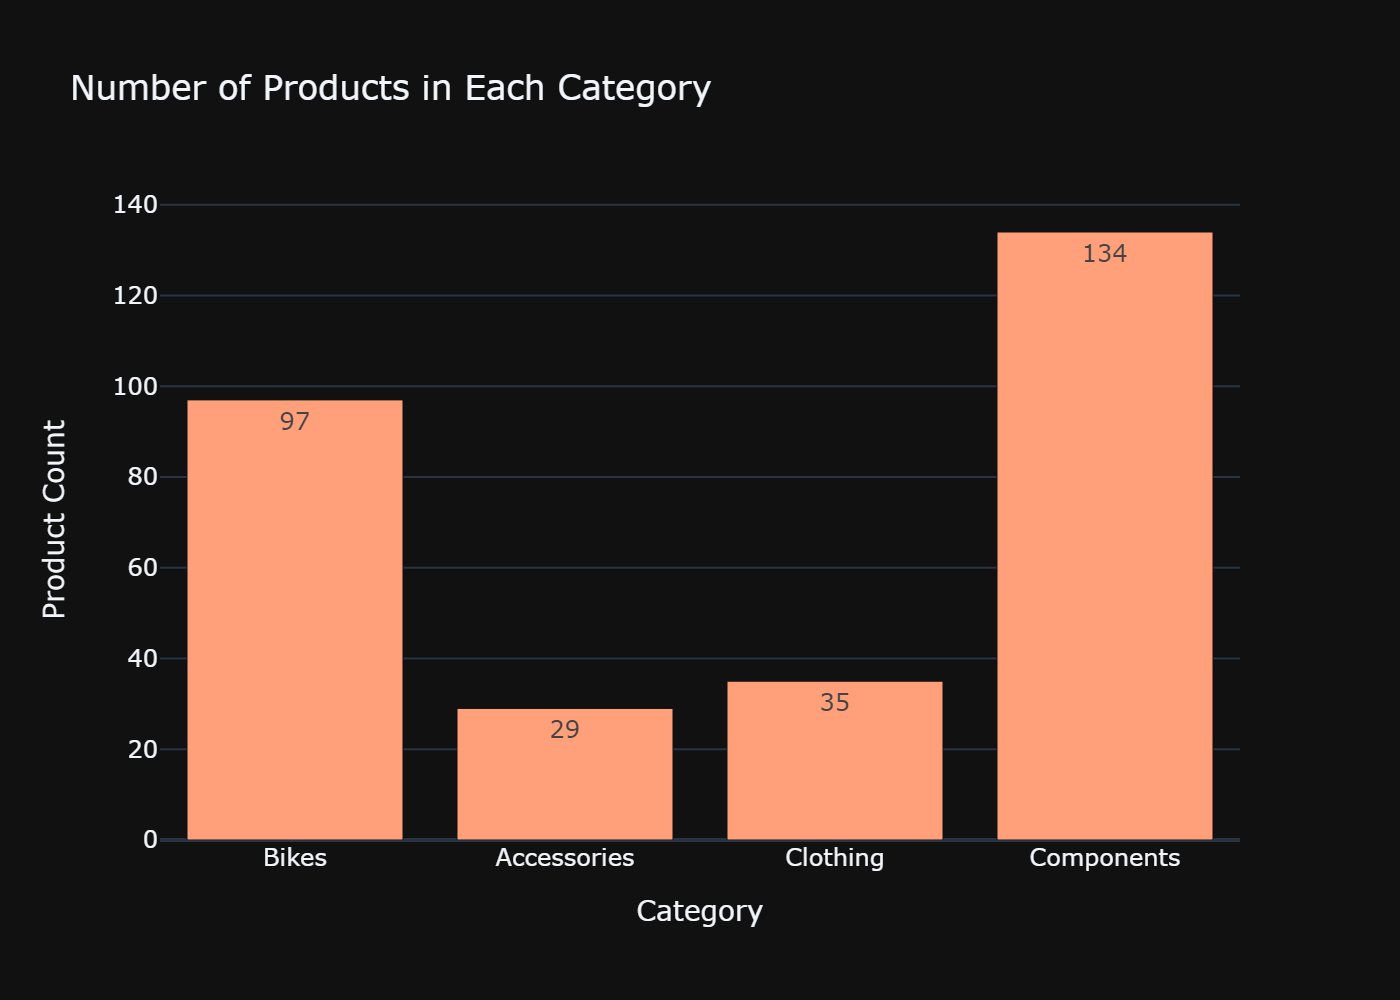

In [46]:
vn.ask("What is the number of products in each category")


SELECT c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate, SUM(po.subtotal) AS total_purchase
FROM sales.customer c
JOIN purchasing.purchaseorderheader po ON c.customerid = po.vendorid
GROUP BY c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate
ORDER BY total_purchase DESC
LIMIT 10


,customerid,personid,storeid,territoryid,rowguid,modifieddate,total_purchase


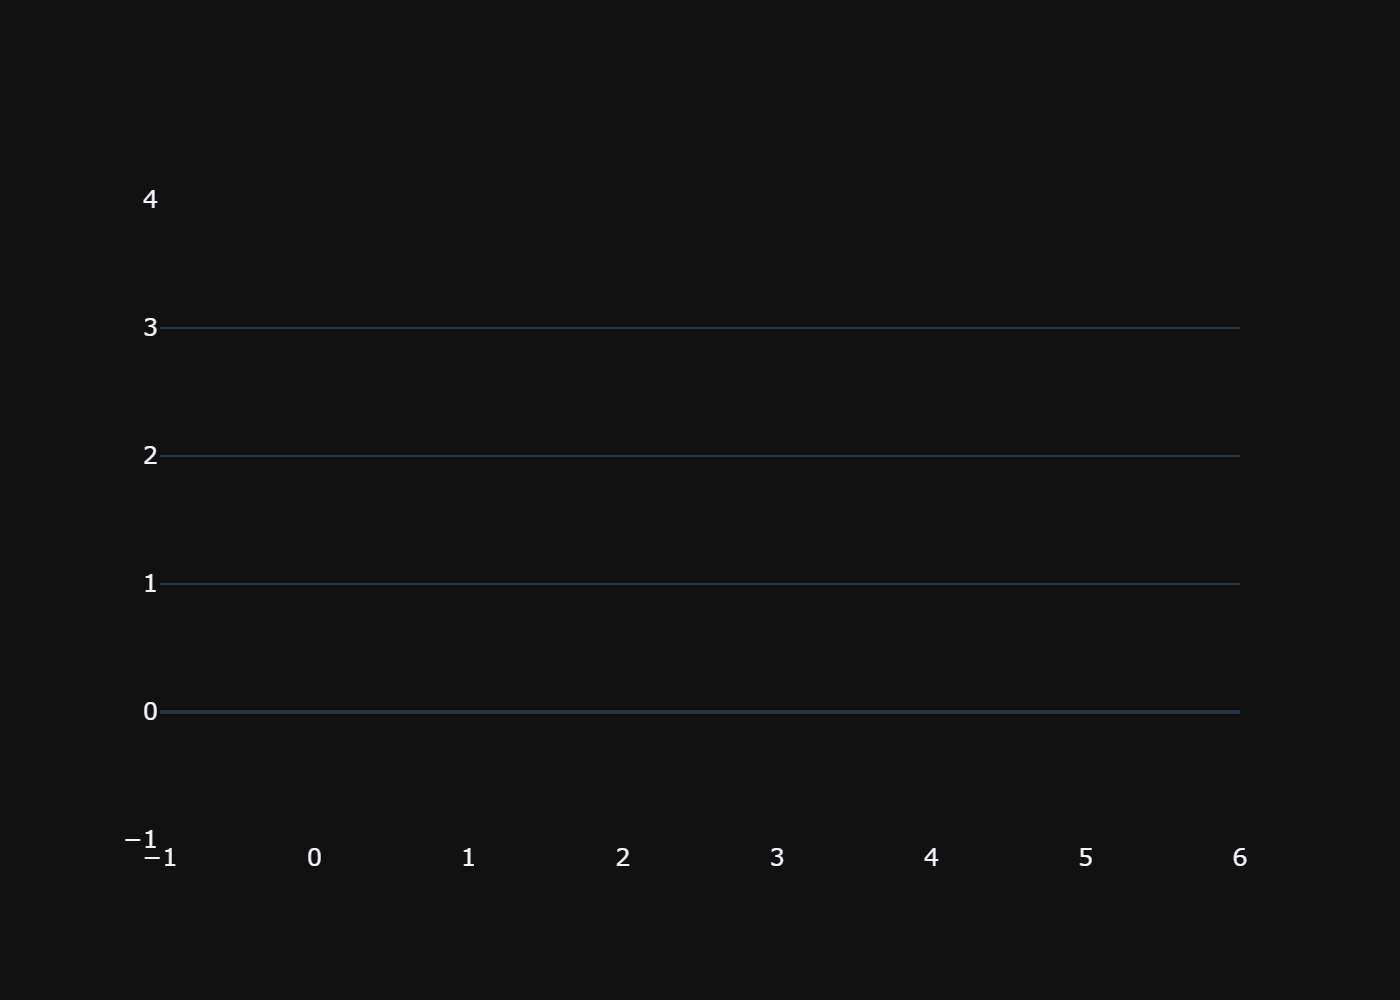

In [48]:
vn.ask("Top 10 Customers with the highest purchase")


In [49]:
vn.ask("Top 10 Customers with the highest purchase")


SELECT c.customerid, c.firstname, c.lastname, SUM(po.totaldue) AS total_purchase
FROM sales.customer c
JOIN purchasing.purchaseorderheader po ON c.customerid = po.vendorid
GROUP BY c.customerid, c.firstname, c.lastname
ORDER BY total_purchase DESC
LIMIT 10


ValidationError: column c.firstname does not exist
LINE 1: SELECT c.customerid, c.firstname, c.lastname, SUM(po.totaldu...
                             ^


In [50]:
vn.ask("Top 10 Customers with the highest purchase")


SELECT TOP 10 c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate, SUM(po.subtotal) AS total_purchase
FROM sales.customer c
JOIN purchasing.purchaseorderheader po ON c.customerid = po.vendorid
GROUP BY c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate
ORDER BY total_purchase DESC


ValidationError: syntax error at or near "10"
LINE 1: SELECT TOP 10 c.customerid, c.personid, c.storeid, c.territo...
                   ^


SELECT e.businessentityid, p.firstname, p.lastname, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN humanresources.employee e ON s.salespersonid = e.businessentityid
JOIN person.person p ON e.businessentityid = p.businessentityid
GROUP BY e.businessentityid, p.firstname, p.lastname
ORDER BY total_sales DESC
LIMIT 10


,businessentityid,firstname,lastname,total_sales
0,276,Linda,Mitchell,10367007.4265
1,277,Jillian,Carson,10065803.5404
2,275,Michael,Blythe,9293903.0046
3,289,Jae,Pak,8503338.6457
4,279,Tsvi,Reiter,7171012.7501
5,281,Shu,Ito,6427005.5540
6,282,José,Saraiva,5926418.3555
7,290,Ranjit,Varkey Chudukatil,4509888.9311
8,283,David,Campbell,3729945.3490
9,278,Garrett,Vargas,3609447.2148


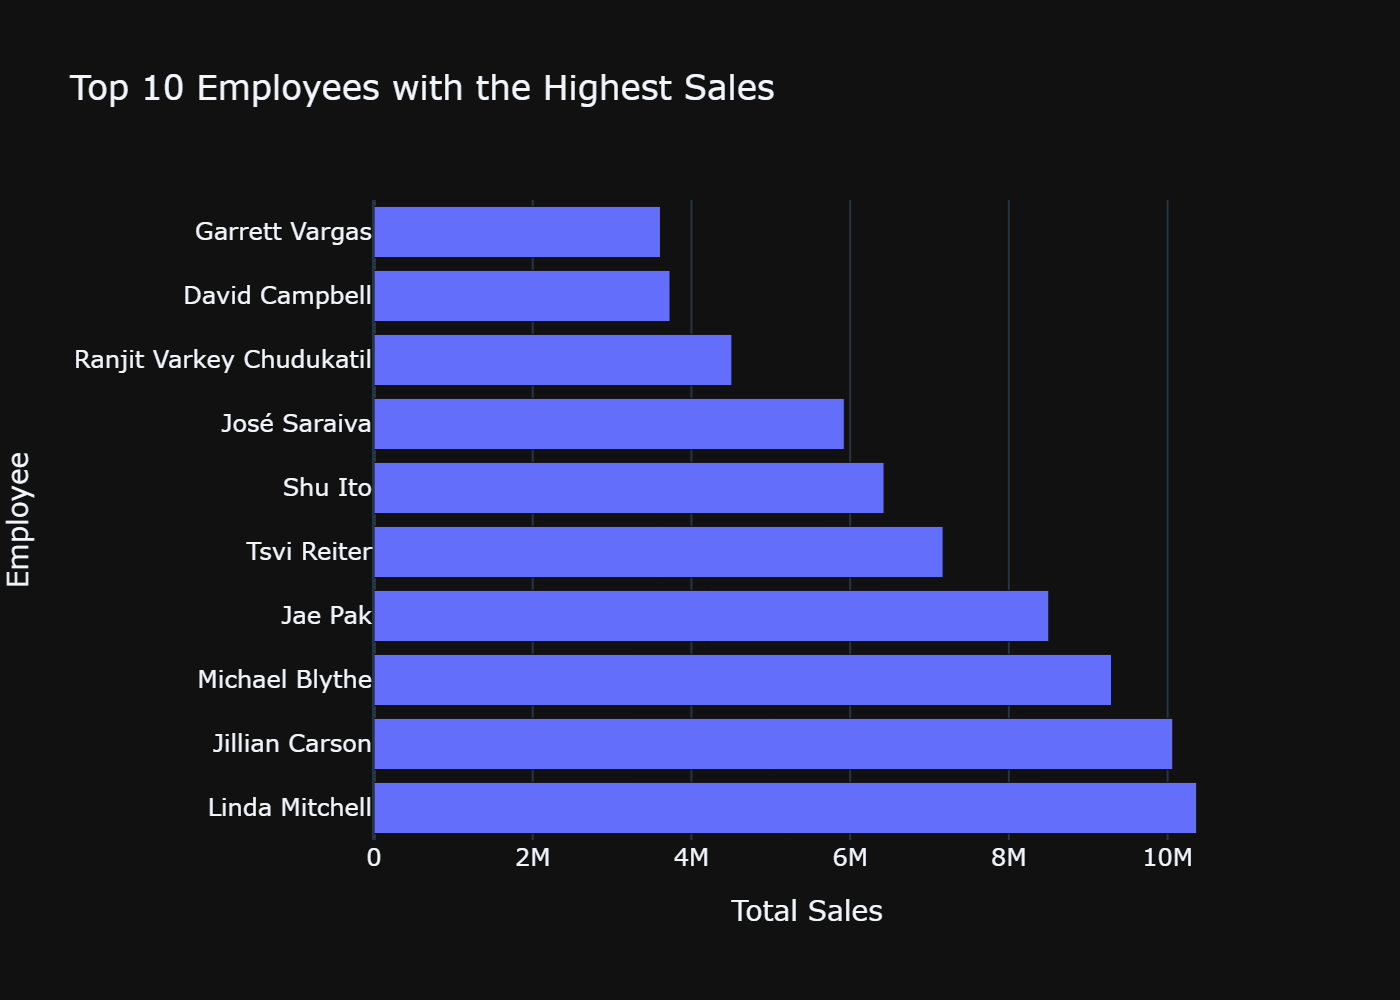

In [51]:
vn.ask("Top 10 Employees with the highest sale")


In [52]:
vn.ask("Top 10 most sale products")


SELECT p.name AS product_name, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN production.product p ON s.productid = p.productid
GROUP BY p.name
ORDER BY total_sales DESC
LIMIT 10


ValidationError: column s.productid does not exist
LINE 3: JOIN production.product p ON s.productid = p.productid
                                     ^
HINT:  Perhaps you meant to reference the column "p.productid".


In [53]:
vn.ask("Top 10 most sale products")


SELECT p.name, SUM(s.salestotal) AS total_sales
FROM sales.vproductssales s
JOIN production.product p ON s.productid = p.productid
GROUP BY p.name
ORDER BY total_sales DESC
LIMIT 10


ValidationError: relation "sales.vproductssales" does not exist
LINE 2: FROM sales.vproductssales s
             ^


SELECT e.businessentityid, p.firstname, p.lastname, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN humanresources.employee e ON s.salespersonid = e.businessentityid
JOIN person.person p ON e.businessentityid = p.businessentityid
GROUP BY e.businessentityid, p.firstname, p.lastname
ORDER BY total_sales DESC
LIMIT 10


,businessentityid,firstname,lastname,total_sales
0,276,Linda,Mitchell,10367007.4265
1,277,Jillian,Carson,10065803.5404
2,275,Michael,Blythe,9293903.0046
3,289,Jae,Pak,8503338.6457
4,279,Tsvi,Reiter,7171012.7501
5,281,Shu,Ito,6427005.5540
6,282,José,Saraiva,5926418.3555
7,290,Ranjit,Varkey Chudukatil,4509888.9311
8,283,David,Campbell,3729945.3490
9,278,Garrett,Vargas,3609447.2148


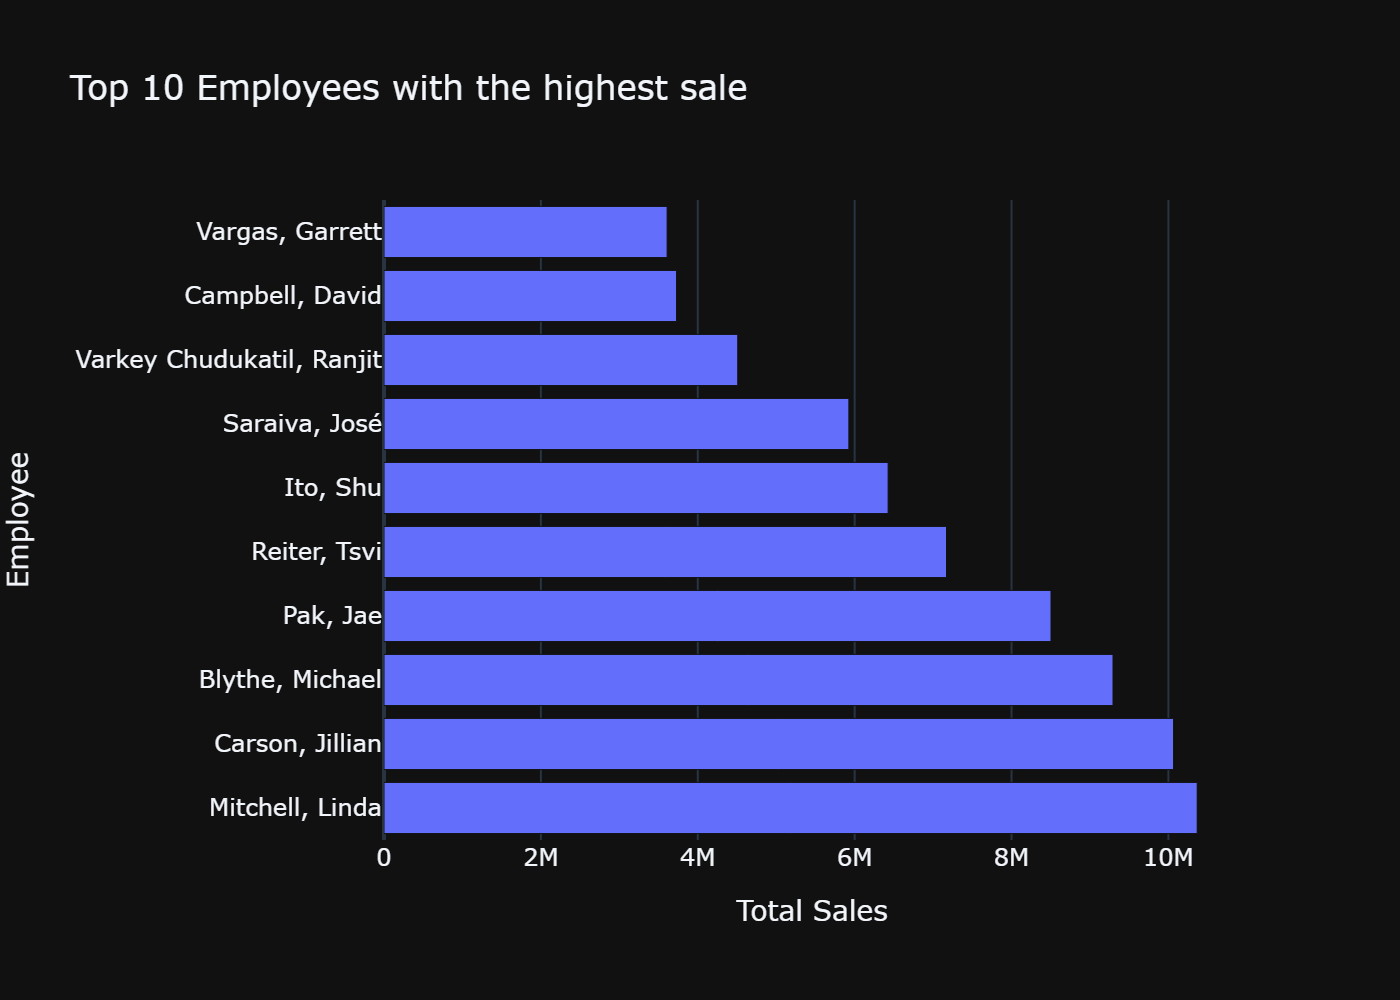

SELECT e.businessentityid, p.firstname, p.middlename, p.lastname, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN humanresources.employee e ON s.salespersonid = e.businessentityid
JOIN person.person p ON e.businessentityid = p.businessentityid
GROUP BY e.businessentityid, p.firstname, p.middlename, p.lastname
ORDER BY total_sales DESC
LIMIT 10


,businessentityid,firstname,middlename,lastname,total_sales
0,276,Linda,C,Mitchell,10367007.4265
1,277,Jillian,None,Carson,10065803.5404
2,275,Michael,G,Blythe,9293903.0046
3,289,Jae,B,Pak,8503338.6457
4,279,Tsvi,Michael,Reiter,7171012.7501
5,281,Shu,K,Ito,6427005.5540
6,282,José,Edvaldo,Saraiva,5926418.3555
7,290,Ranjit,R,Varkey Chudukatil,4509888.9311
8,283,David,R,Campbell,3729945.3490
9,278,Garrett,R,Vargas,3609447.2148


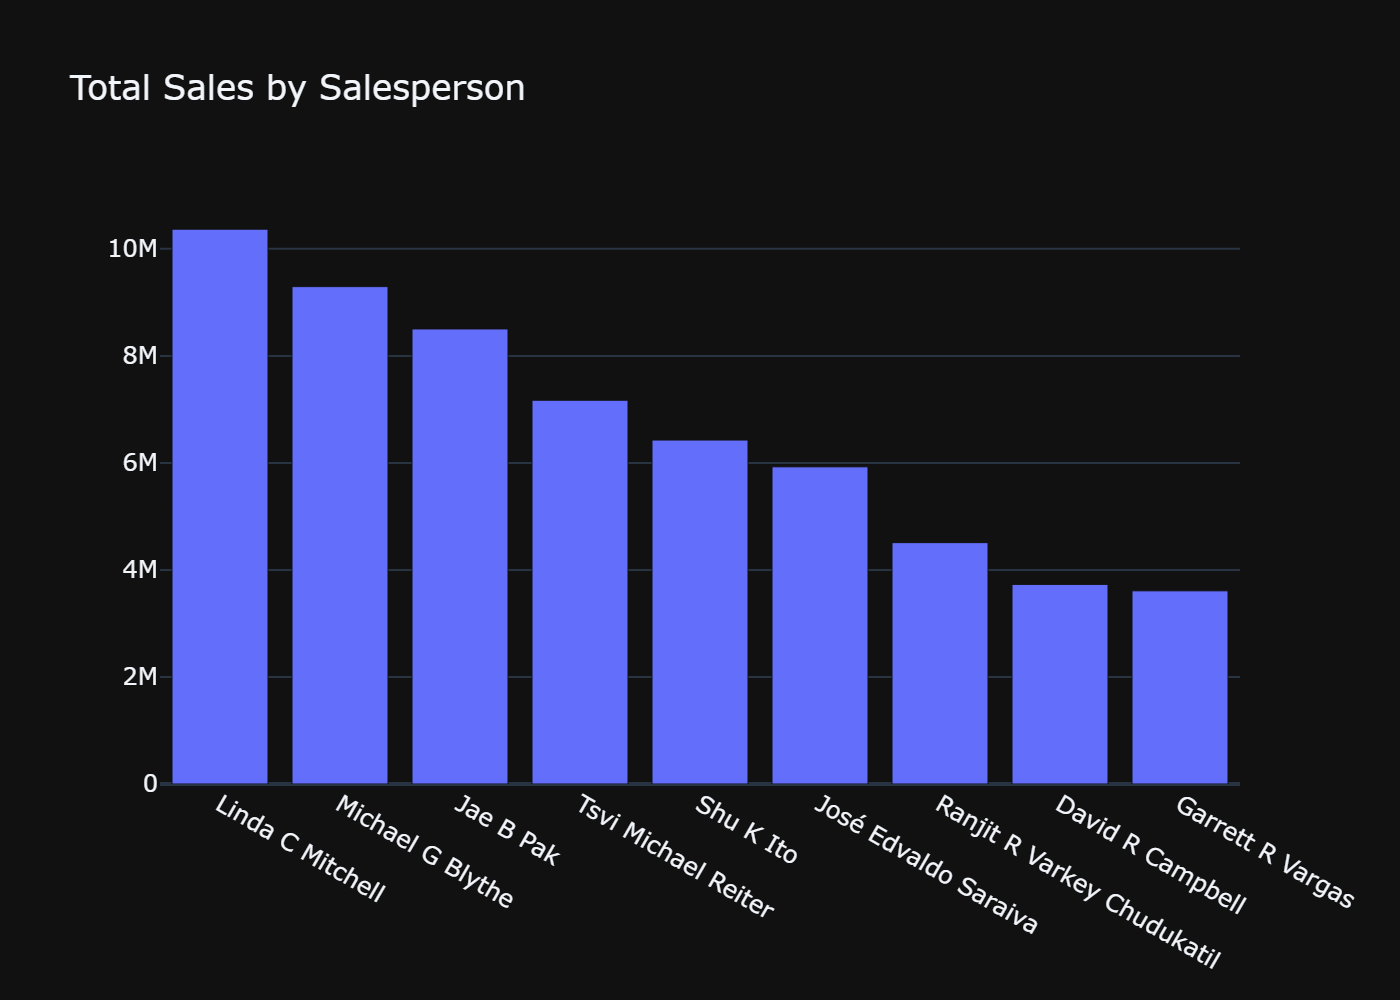

In [57]:
vn.ask("Top 10 Employees with the highest sale")
vn.ask("and what are their middlenames?")
vn.ask("and where they live?")
vn.ask("and what are their emails?")